
# 📊 Beginner Data Analytics Project — Netflix Movies & TV Shows

This is a **ready-to-run beginner project** for data analytics in Jupyter Notebook.

**Workflow:** Collect → Clean → Analyze → Visualize → Present  
**Dataset:** `netflix_titles.csv` (Kaggle: *Netflix Movies and TV Shows*) — put it in the **same folder** as this notebook.



## 1) Setup
We use:
- `pandas` for data handling
- `matplotlib` for charts

If needed, install them (skip if you already have them).


In [1]:

# If needed, uncomment and run:
# !pip install pandas matplotlib



## 2) Import libraries


In [2]:

import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display  # ensure display() is available

# Matplotlib default settings (no explicit styles/colors)
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['figure.autolayout'] = True



## 3) Load dataset
Ensure `netflix_titles.csv` is in the same folder as this notebook. Update `CSV_PATH` if needed.


In [3]:

CSV_PATH = "netflix_titles.csv"  # change if your file is elsewhere

if not os.path.exists(CSV_PATH):
    raise FileNotFoundError(f"Could not find {CSV_PATH}. Please place the dataset in this folder or update CSV_PATH.")

df = pd.read_csv(CSV_PATH)
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



## 4) Quick exploration
Shape, columns, dtypes, and missing values.


In [4]:

print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nInfo:")
df.info()  # print to stdout (no display(None))

print("\nPreview:")
display(df.head(10))

print("\nMissing values:")
display(df.isna().sum().sort_values(ascending=False))


Shape: (8807, 12)

Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Preview:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...



Missing values:


director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64


## 5) Data cleaning
- Convert `date_added` to datetime  
- Fill missing `country` with `"Unknown"`  
- Strip extra spaces in text columns  
- Create helper columns: `year_added`, `month_added`


In [5]:

# Keep original for reference
raw = df.copy()

# 5.1 Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# 5.2 Fill missing country with "Unknown"
df['country'] = df['country'].fillna("Unknown")

# 5.3 Strip whitespace in object columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()

# 5.4 Helper columns for date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

print("Done. Missing values after cleaning:")
display(df.isna().sum().sort_values(ascending=False))
df.head()


Done. Missing values after cleaning:


month_added     98
date_added      98
year_added      98
title            0
show_id          0
type             0
country          0
cast             0
director         0
release_year     0
duration         0
rating           0
description      0
listed_in        0
dtype: int64

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,nan,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,nan,nan,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,nan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0



## 6) Questions we will answer
1. **How many Movies vs TV Shows are on Netflix?**  
2. **Which countries have the most Netflix titles?**  
3. **What's the trend of titles released over the years?**  
4. **What are the Top 10 genres?**  
5. **What's the average movie duration?**  
6. **Who are the most frequent directors?**


### Q1) Movies vs TV Shows

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

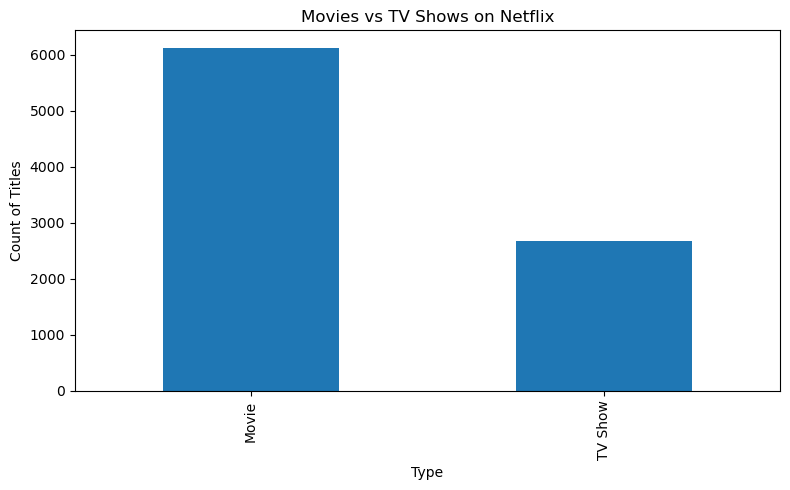

In [6]:

type_counts = df['type'].value_counts().sort_index()
display(type_counts)

plt.figure()
type_counts.plot(kind='bar')
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count of Titles")
plt.show()



### Q2) Top 10 countries by title count
Some rows contain multiple countries separated by commas. We'll split and count each country separately.


,count
country,
United States,3690
India,1046
Unknown,831
United Kingdom,806
Canada,445
France,393
Japan,318
Spain,232
South Korea,231


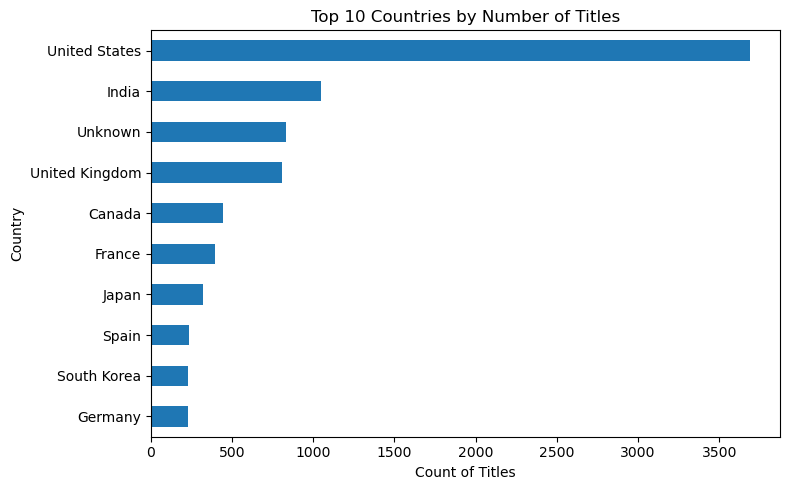

In [7]:

countries_series = (
    df['country']
      .fillna("Unknown")
      .astype(str)
      .str.split(',')
      .explode()
      .str.strip()
)

country_counts = countries_series.value_counts().head(10)
display(country_counts.to_frame('count'))

plt.figure()
country_counts.sort_values(ascending=True).plot(kind='barh')
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Count of Titles")
plt.ylabel("Country")
plt.show()


### Q3) Trend of titles by release year

release_year
2002      51
2003      61
2004      64
2005      80
2006      96
2007      88
2008     136
2009     152
2010     194
2011     185
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64

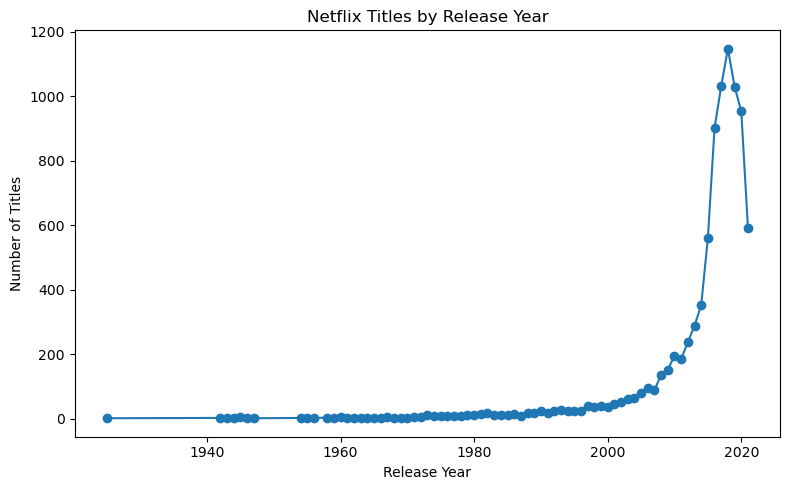

In [8]:

year_counts = df['release_year'].value_counts().sort_index()
display(year_counts.tail(20))

plt.figure()
year_counts.plot(kind='line', marker='o')
plt.title("Netflix Titles by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()



### Q4) Top 10 genres
Split the `listed_in` column (comma-separated) and count frequency.


,count
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


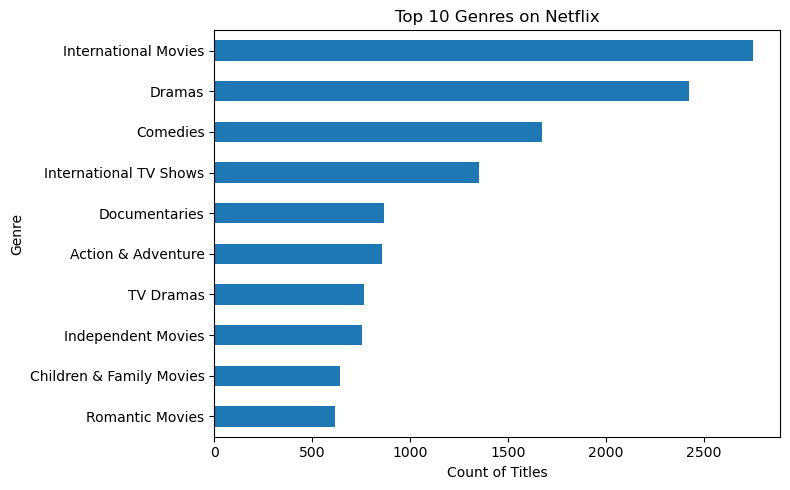

In [9]:

genres_series = (
    df['listed_in']
      .dropna()
      .astype(str)
      .str.split(',')
      .explode()
      .str.strip()
)

genre_counts = genres_series.value_counts().head(10)
display(genre_counts.to_frame('count'))

plt.figure()
genre_counts.sort_values(ascending=True).plot(kind='barh')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count of Titles")
plt.ylabel("Genre")
plt.show()


### Q5) Average movie duration (in minutes)

In [10]:

movies = df[df['type'] == 'Movie'].copy()

movies['duration_min'] = (
    movies['duration']
        .astype(str)
        .str.replace("min", "", regex=False)
        .str.replace(" ", "", regex=False)
        .str.extract(r'(\d+)', expand=False)
        .astype(float)
)

avg_duration = movies['duration_min'].dropna().mean()
if pd.notna(avg_duration):
    print(f"Average movie duration: {avg_duration:.1f} minutes")
else:
    print("No movie duration data available.")


Average movie duration: 99.6 minutes



### Q6) Most frequent directors
Some titles lack director data. We'll count non-null directors and show the Top 10.


,count
director,
nan,2634
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Youssef Chahine,12


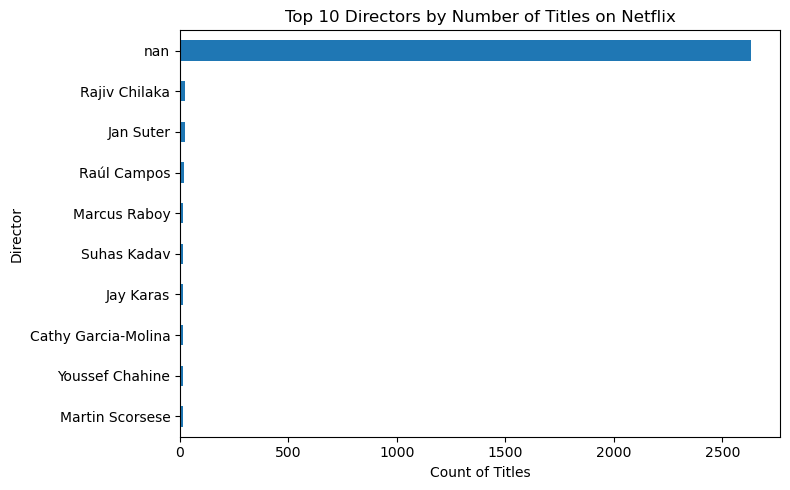

In [11]:

directors = (
    df['director']
      .dropna()
      .astype(str)
      .str.split(',')
      .explode()
      .str.strip()
)

top_directors = directors.value_counts().head(10)
display(top_directors.to_frame('count'))

plt.figure()
top_directors.sort_values(ascending=True).plot(kind='barh')
plt.title("Top 10 Directors by Number of Titles on Netflix")
plt.xlabel("Count of Titles")
plt.ylabel("Director")
plt.show()



### Bonus) Titles **added to Netflix** per year
Uses `year_added` from `date_added`.


year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64

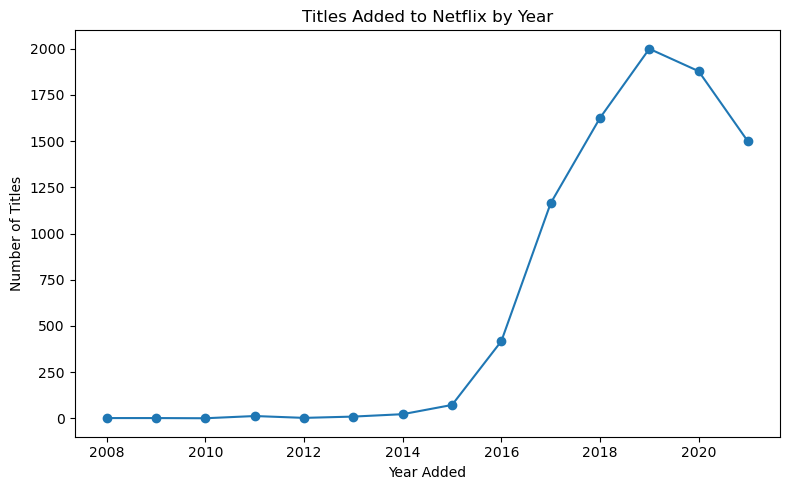

In [12]:

added_year_counts = df['year_added'].value_counts().sort_index()
display(added_year_counts)

plt.figure()
added_year_counts.plot(kind='line', marker='o')
plt.title("Titles Added to Netflix by Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()



## 7) Export clean dataset (optional)
Save the cleaned dataframe for Excel / Power BI / Tableau.


In [13]:

OUTPUT_CSV = "netflix_titles_clean.csv"
df.to_csv(OUTPUT_CSV, index=False)
print(f"Saved cleaned dataset to {OUTPUT_CSV}")


Saved cleaned dataset to netflix_titles_clean.csv



## 8) Summary & Insights
Replace with your findings:
- Movies vs TV Shows distribution
- Top contributing countries
- Release trend observations
- Most common genres
- Average movie duration
- Top directors

---
Notebook generated on **2025-08-19 08:00:09 UTC**  
Author: **Jonah Chawre**
